# Analisis Prediktif dan Segmentasi Data Kanker Payudara Menggunakan Logistic Regression dan K-Means Clustering

**Tugas Besar Penambangan Data**

Kelas    : SI-47-10
Kelompok : 12

## Informasi Dataset

Dataset ini berasal dari University of Wisconsin Hospitals, Madison. Dataset ini digunakan untuk mendiagnosis kanker payudara berdasarkan fitur-fitur yang diekstraksi dari gambar digital hasil aspirasi jarum halus (Fine Needle Aspiration - FNA) dari massa payudara. Fitur-fitur tersebut menggambarkan karakteristik inti sel yang terdapat dalam gambar tersebut.

### Karakteristik Dataset
- Jumlah Instansi (Baris): 569

- Jumlah Fitur (Kolom): 30 fitur numerik

- Tipe Fitur: Numerik kontinu (real-valued)

- Tugas yang Sesuai: Klasifikasi

- Nilai yang Hilang: Tidak ada

- Target (Label): Diagnosis kanker payudara:

- M = Malignant (ganas)

- B = Benign (jinak)

### Daftar Fitur
1. Radius: Rata-rata jarak dari pusat ke titik-titik pada perimeter.

2. Texture: Standar deviasi nilai skala abu-abu.

3. Perimeter: Panjang perimeter inti sel.

4. Area: Luas inti sel.

5. Smoothness: Variasi lokal dalam panjang radius.

6. Compactness: (Perimeter² / Area) - 1.0.

7. Concavity: Tingkat keparahan bagian cekung pada kontur.

8. Concave Points: Jumlah bagian cekung pada kontur.

9. Symmetry: Tingkat simetri inti sel.

10. Fractal Dimension: "Pendekatan garis pantai" - 1, mengukur kompleksitas kontur.

## Business Understanding

## Data Understanding

Sebelum melakukan analisa lebih dalam, tahap pertama yang harus dilakukan adalah melakukan eksplorasi terhadap dataset yang akan digunakan.

Import dataset dilakukan menggunakan library bawaan dari sumber dataset UCI Machine Learning Repository

In [ ]:
## Import dataset

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 

### Memeriksa informasi dataset

Bagian ini dilakukan untuk memeriksa struktur dataset dan tipe data dalamd dataset.

In [2]:
X.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
y.head()

,Diagnosis
0,M
1,M
2,M
3,M
4,M


In [4]:
print(f"Shape dataframe fitur: {X.shape}")
print(f"Shape dataframe target: {y.shape}")

Shape dataframe fitur: (569, 30)
Shape dataframe target: (569, 1)


Setelah melakukan import, kita dapat melihat bahwa fitur dataset terdiri dari 569 row (instance) data dan 30 fitur beserta jumlah row target yang sama yaitu 596.

In [6]:
# Melihat informasi feature
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [7]:
# Melihat informasi target
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Diagnosis  569 non-null    object
dtypes: object(1)
memory usage: 4.6+ KB


Berdasarkan informasi tersebut, kita dapat melihat bahwa seluruh fitur dataset memiliki tipe data numeric yaitu float. Ini sesuai dengan deskripsi resmi dari halaman dataset yaitu data merupakan hasil pengukuran cell yang didapatkan menggunakan teknik *Fine Needle Aspiration*. Selain fitur numeric, target atau label dataset memiliki tipe data object yang berisikan label klasifikasi jenis tumor M (ganas) dan B (jinak)

### Memeriksa duplikasi data

Setelah memeriksa tipe data, selanjutnya kita akan melakukan tahap pemeriksaan duplikasi data. Pengecekan duplikasi data merupakan tahapan yang penting karena data yang duplikat dapat menghasilkan bias dan merubah distribusi data sehingga menghasilkan hasil analisis yang kurang akurat

In [9]:
# Memeriksa duplikasi data pada fitur

X.duplicated().sum()

0

Tidak terdapat duplikasi data pada dataset yang digunakan

### Memeriksa null value
Penanganan nilai hilang merupakan salah satu tahapan yang paling penting. Nilai hilang pada dataset dapat mempengaruhi hasil prediksi dan analisis secara signifikan karena beberapa hal berikut: 
- Bias pada dataset
- Mempengaruhi algoritma machine learning
- Kualitas data yang buruk menghasilkan hasil prediksi yang buruk

Berdasarkan informasi resmi dari halaman dataset tidak terdapat nilai hilang. Tapi tahapan ini penting dilakukan untuk memastikan kualitas data yang akan digunakan

In [11]:
X.info(), y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

(None, None)

Kita dapat melihat bahwa seluruh fitur memiliki count row data yang konsisten sebanyak 569 row.

In [12]:
X.isnull().sum()

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64

In [13]:
y.isnull().sum()

Diagnosis    0
dtype: int64

Tidak terdapat nilai hilang pada dataset.

### Memeriksa ukuran statistik seluruh fitur dataset
Bagian ini dilakukan untuk melihat ukuran statistik seperti nilai pusat dan sebaran masing masing fitur

In [16]:
X.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Selanjutnya kita akan memeriksa distribusi masing-masing fitur

In [23]:
# Import library visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

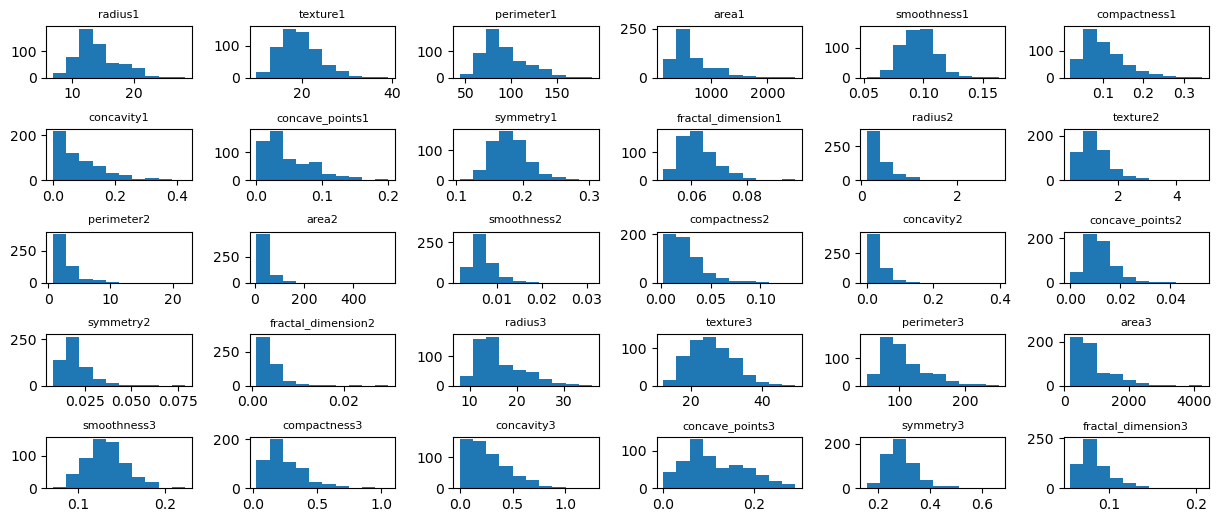

In [34]:
columns = X.columns
n_bins = 20

fig, axs = plt.subplots(5, 6, figsize=(15, 6), facecolor='w', edgecolor='k', squeeze=False)
plt.subplots_adjust(wspace=0.4, hspace=1)

axs = axs.ravel()

for i, column in enumerate(columns):
    axs[i].hist(pd.DataFrame(X[column]))
    axs[i].set_title(column, fontsize=8)

Kita dapat melihat bahwa fitur-fitur pada dataset kebanyakan memiliki distribusi berbentuk bell curve dan righ-skewed (kebanyakan nilai data berkumpul di nilai rendah)

### Pemeriksaan Outlier
Kita akan melakukan pemeriksaan outlier dengan visualisasi boxplot untuk setiap fitur dalam dataset.

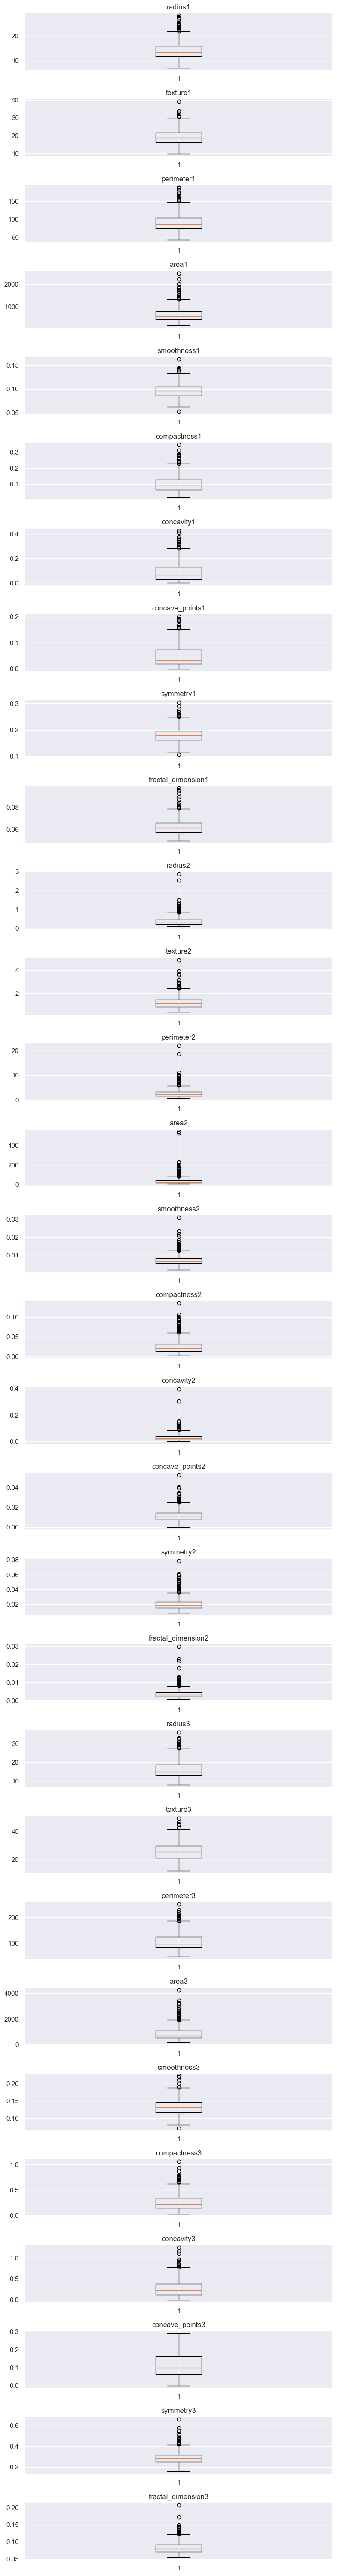

In [42]:
fig, axs = plt.subplots(30, 1, figsize=(8, 60))

for i, column in enumerate(columns):
    axs[i].boxplot(X[column])
    axs[i].set_title(column)

plt.tight_layout()
plt.show()

Berdasarkan hasil visualisasi boxplot, kita dapat melihat masih terdapat outlier yaitu data yang terdapat di luar *whiskers* dari boxplot.

## Data Preprocessing

Setelah memahami dataset yang akan digunakan, selanjutnya kita akan melakukan preprocessing terhadap dataset sampai dengan pemisahan dataset menjadi train dan test set.

### Mapping target
Seperti yang kita lihat pada tahap sebelumnya, dataset masih memiliki target dengan tanda 'M' untuk malignant dan 'B' untuk Benign. Pada tahap ini, dilakukan mapping value menjadi numeric untuk mempermudah pelatihan model

In [51]:
y['Diagnosis'] = y['Diagnosis'].map({'M': 1, 'B': 0})

C:\Users\ANAKING FAIQAL LUFI\AppData\Local\Temp\ipykernel_16492\2042718244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Diagnosis'] = y['Diagnosis'].map({'M': 1, 'B': 0})


In [52]:
y.head()

,Diagnosis
0,1
1,1
2,1
3,1
4,1


In [54]:
y['Diagnosis'].unique()

array([1, 0], dtype=int64)

Sekarang seluruh nilai pada target sudah bertipe data numeric sehingga target sudah siap untuk digunakan